In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [45]:
data=pd.read_csv('./spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


<Axes: xlabel='Category'>

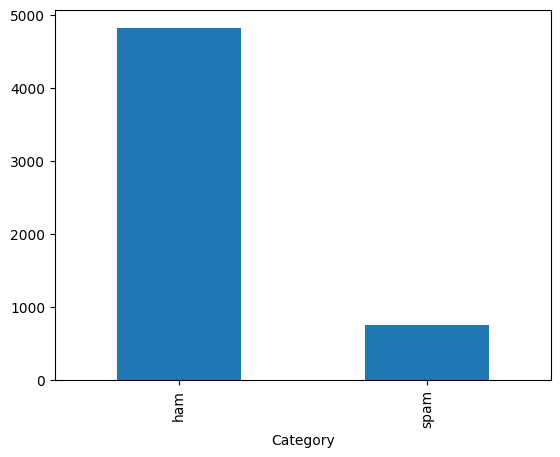

In [46]:
data['Category'].value_counts().plot.bar()

In [47]:
data.drop_duplicates()
message=data['Message'].copy()
message

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
5572    Congratulations! Your credit score entitles yo...
Name: Message, Length: 5573, dtype: object

DataPreprocessing


In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Stemming

In [48]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stemer=PorterStemmer()

In [7]:
message.values

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [49]:
corpus=[]
for i in range(0,len(message)):
    msg=re.sub('[^a-zA-Z]',' ',message[i])
    msg=msg.lower()
    msg=msg.split()

    msg=[stemer.stem(word) for word in msg if not word in stopwords.words('english')] 
    
    msg=' '.join(msg)
    corpus.append(msg)

In [50]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

Word Embedding

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(binary=True,max_features=1000)
X=cv.fit_transform(corpus)
cv.vocabulary_

{'go': 332,
 'point': 649,
 'crazi': 169,
 'avail': 52,
 'great': 345,
 'world': 973,
 'la': 439,
 'got': 341,
 'wat': 936,
 'ok': 595,
 'lar': 444,
 'joke': 424,
 'wif': 956,
 'free': 303,
 'entri': 250,
 'wkli': 967,
 'comp': 146,
 'win': 959,
 'cup': 173,
 'final': 287,
 'st': 809,
 'may': 507,
 'text': 849,
 'receiv': 691,
 'question': 675,
 'std': 814,
 'txt': 897,
 'rate': 682,
 'appli': 40,
 'dun': 229,
 'say': 737,
 'earli': 232,
 'alreadi': 24,
 'nah': 560,
 'think': 855,
 'goe': 334,
 'usf': 915,
 'live': 474,
 'around': 44,
 'though': 859,
 'freemsg': 304,
 'hey': 372,
 'week': 944,
 'word': 971,
 'back': 60,
 'like': 468,
 'fun': 314,
 'still': 815,
 'xxx': 986,
 'send': 753,
 'even': 255,
 'brother': 95,
 'speak': 805,
 'treat': 886,
 'per': 628,
 'request': 706,
 'set': 757,
 'caller': 104,
 'press': 661,
 'copi': 159,
 'friend': 308,
 'winner': 961,
 'valu': 919,
 'network': 568,
 'custom': 176,
 'select': 749,
 'prize': 666,
 'reward': 712,
 'claim': 132,
 'call': 103,


In [102]:
Y=data['Category'].values
Y=np.where(Y=='spam',1,0)
Y

array([0, 0, 1, ..., 0, 0, 1])

In [103]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=100,test_size=0.25)

In [158]:
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


modelclasses=[
    ["AdaBoost",AdaBoostClassifier(n_estimators=100)],
    ["DecisionTree",DecisionTreeClassifier()],
    ["RandomForest",RandomForestClassifier()],
    ["LogisticRegression",LogisticRegression()],
]
AccuracyScores=[]
for modelname,Model in modelclasses:        
        model=Model
        model.fit(xtrain,ytrain)
        ypred=model.predict(xtest)
        AccuracyScores.append((modelname,abs(accuracy_score(ytest,ypred))*100))


c:\Users\sures\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [164]:
pd.DataFrame(data=AccuracyScores,columns=['Model','Score'])

,Model,Score
0,AdaBoost,97.847920
1,DecisionTree,96.987088
2,RandomForest,97.847920
3,LogisticRegression,98.134864


In [167]:
def SpamClassifier(inputText):
    inputText=re.sub('[^a-zA-Z]',' ',inputText)
    inputText=inputText.lower()
    inputText=inputText.split()
    inputText=[stemer.stem(word) for word in inputText if not word in stopwords.words('english')] 
    inputText=' '.join(inputText)


    inputText=cv.transform([inputText])
    logistic=LogisticRegression()
    logistic.fit(xtrain,ytrain)
    result=logistic.predict(inputText)[0]

    
    print('Message is a Spam'if result==1 else 'Message Not spam')

In [168]:
inputText="Congratulations! Your credit score entitles you to a no-interest Visa credit card. Click here to claim:"
SpamClassifier(inputText)


spam


@SureshKrishna